In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline
import matplotlib.pyplot as plt

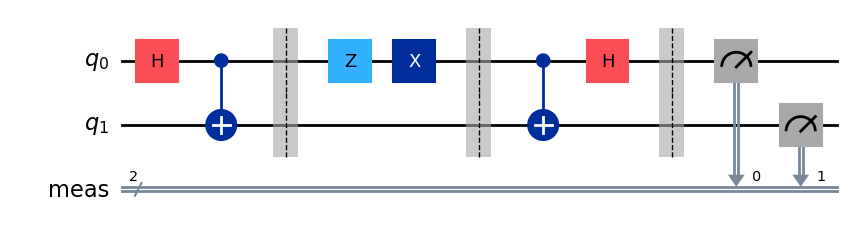

In [2]:
circuit = QuantumCircuit(2)

# Prepare the Bell state and distribute qubits
circuit.h(0)
circuit.cx(0, 1)

circuit.barrier()

# Olivia encodes her message and transmits her qubit to Barron
match message := '11':  # the message
    case '00':
        circuit.id(0)
    case '01':
        circuit.z(0)
    case '10':
        circuit.x(0)
    case '11':
        circuit.z(0)
        circuit.x(0)

circuit.barrier()

# Barron decodes Olivia's message
circuit.cx(0, 1)
circuit.h(0)

# Barron measures the qubits to read Olivia's message
circuit.measure_all()
circuit.draw(output='mpl')
plt.show()

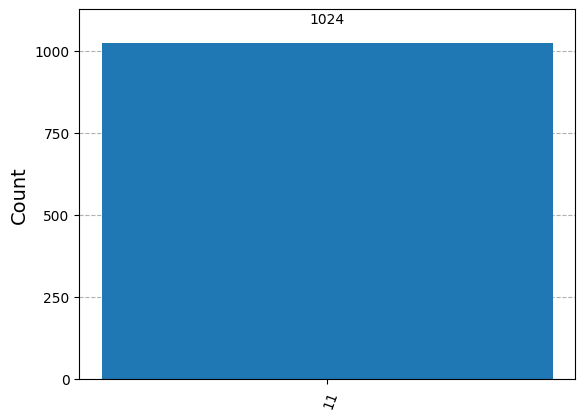

In [3]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
plot_histogram(result.get_counts())
plt.show()